# ASTR 21100 

# "Computational Techniques in Astrophysics"

## Instructor: Andrey Kravtsov

### office: ERC 415; email: kravtsov@uchicago.edu
### office hours: Tue, 10:30am-noon (unless noted otherwise)

#### Teaching Assistants: 
#### Dimitrios Tanoglidis (dtanoglidis@uchicaago.edu)
#### Georgios Zakharegkas (gzakharegkas@uchicago.edu)

## Optimization methods 

Optimization is numerical computations of the function parameter values, for which the function has minimum or maximum. 

Given that any maximum of $f(\mathbf{x})$ is a minimum of $-f(\mathbf{x})$, the actual methods focus on minimizing the function. The same methods can be used for finding the maximum if we apply it to the negative of the function. 

In [2]:
import numpy as np 

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline
# reusing my codes from the repository
from codes.plot_utils import plot_pretty
plot_pretty(dpi=150, fontsize=12)

In [3]:
plot_pretty(dpi=150, fontsize=12)

### Taylor expansion of a multi-dimensional function

Taylor expansion of the function of $D$ variables combined in a vector $\mathbf{x}=(x_0, x_1,\ldots, x_{D-1})$ of size $D$ around some point $\mathbf{x}_0$ is

$$f(\mathbf{x})\approx f(\mathbf{x}_0)+ \nabla f(\mathbf{x}_0)\,(\mathbf{x}-\mathbf{x}_0) + \frac{1}{2}\,(\mathbf{x}-\mathbf{x}_0)^\intercal\,\nabla^2f(\mathbf{x}_0)\, (\mathbf{x}-\mathbf{x}_0).$$ 

Here $^\intercal$ indicates <a href="https://en.wikipedia.org/wiki/Transpose">transpose</a> of the vector, while $\nabla$ and $\nabla^2$ are called the ***gradient*** vector and the ***Hessian*** matrix, respectively, and are the first and second derivatives in $D$-dimensions:

$$\mathbf{g}(\mathbf{x})=\nabla f = \left(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1},\ldots,\frac{\partial f}{\partial x_{D-1}}\right)$$

$$\mathbf{H}(\mathbf{x})=\nabla^2 f = 
\begin{bmatrix}
\frac{\partial^2f}{\partial x_0^2} & \frac{\partial^2f}{\partial x_0\partial x_1} &\ldots &\ldots & \frac{\partial^2f}{\partial x_0\partial x_{D-1}}\\
\frac{\partial^2f}{\partial x_1\partial x_0} & \frac{\partial^2f}{\partial x_1^2} & \frac{\partial^2f}{\partial x_1\partial x_2} & \ldots & \frac{\partial^2f}{\partial x_1\partial x_{D-1}}\\
\vdots & & \ddots & & \vdots\\
\frac{\partial^2f}{\partial x_{D-1}\partial x_0} & \frac{\partial^2f}{\partial x_{D-1}\partial x_1} & \ldots& \dots& \frac{\partial^2f}{\partial x_{D-1}^2} 
\end{bmatrix}
$$

### Properties of the gradient and Hessian around function extrema

We will use $g(\mathbf{x})=\nabla f(\mathbf{x})$ and $H(\mathbf{x})=\nabla^2 f(\mathbf{x})$ to denote the gradient and Hessian for convenience. 

Minima and maxima of a function are called its *extrema* and from calculus it is known that at an extremum point $\mathbf{x}_{\rm ex}$, gradient is zero:

$$g(\mathbf{x}_{\rm ex})=0.$$

The sign of $H(\mathbf{x}_{\rm ex})$ determines whether $\mathbf{x}_{\rm ex}$ is minimum or maximum:

$$\mathbf{x}_{\rm ex}\ \ \mathrm{is}\ \ \ 
\begin{cases}
\mathrm{minimum},\ H(\mathbf{x}_{\rm ex})\ {\rm is\ positive\ semi-definite},\\
\mathrm{maximum},\ H(\mathbf{x}_{\rm ex})\ {\rm is\ negative\ semi-definite},
\end{cases}$$

The first couple of terms of the Taylor expansion for the gradient $g(\mathbf{x})=\nabla f(\mathbf{x})$ are: 

$$\mathbf{g}(\mathbf{x})=\nabla f(\mathbf{x})= \nabla f(\mathbf{x}_0) +\nabla^2 f(\mathbf{x}_0)(\mathbf{x}- \mathbf{x}_0) + \ldots = \mathbf{g}(\mathbf{x}_0) + \mathbf{H}(\mathbf{x}_0)\,(\mathbf{x}- \mathbf{x}_0)+\ldots.$$

If $\mathbf{x}=\mathbf{x}_{\rm ex}$ is an extremum, $\nabla f(\mathbf{x}_{\rm ex})=0$ and thus

$$\mathbf{g}(\mathbf{x}_0) + \mathbf{H}(\mathbf{x}_0)\,(\mathbf{x}_{\rm ex}- \mathbf{x}_0)\approx 0$$

or solving for $\mathbf{x}_{\rm ex}$ we have

$$\mathbf{x}_{\rm ex} \approx \mathbf{x}_0 - \mathbf{H}^{-1}(\mathbf{x}_0)\cdot \mathbf{g}(\mathbf{x}_0),$$

where $\mathbf{H}^{-1}$ is the inverse of the Hessian matrix. 


Many optimization methods are based on this because it gives an approximation for where extremum is relative to the point $\mathbf{x}_0$. 

$$\mathbf{x}_{\rm ex} \approx \mathbf{x}_0 - \mathbf{H}^{-1}(\mathbf{x}_0)\cdot \mathbf{g}(\mathbf{x}_0),$$

 
Different methods make different assumptions about $\mathbf{H}^{-1}$ or choices for its calculation. 

### Steepest descent method

assumes that the inverse of the Hessian matrix is equal to the identity matrix (matrix with 1's on the diagonal and zeros elsewhere), $\mathbf{H}^{-1}=I$, which turns the equation into 

$$\mathbf{x}_{\rm ex} = \mathbf{x}_0 -  \mathbf{g}(\mathbf{x}_0),$$

The method proceeds from the starting point $\mathbf{x}_0$ by making a number of steps, with each $(n+1)$-th step moving from point $ \mathbf{x}_n$ to  $\mathbf{x}_{n+1}$ as follows:

$$ \mathbf{x}_{n+1} =  \mathbf{x}_n - \gamma\, \mathbf{g}( \mathbf{x}_n),$$

where $\gamma$ is a parameter that controls the size of the steps relative to the gradient. 

In these methods $\gamma$ needs to be chosen somehow and tuned, if optimal performance is needed. However, optimal value of $\gamma$ will differ for different functions $f$. 

Thus, in the gradient methods like there is a problem of optimal choice of step size parameter.

### Conjugate Gradient method

Conjugate gradient methods dispense with the Hessian matrix
altogether, opting instead to use line optimizations in conjugate directions
to avoid computing second-order derivatives.

### Quasi-Newton methods 

Use user-provided (in cases when second derivatives can be computed analytically) or approximate the inverse of the Hessian matrix in different ways and inolve substantial linear algebra calculations. 

These methods  include the <a href="https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm">Broyden–Fletcher–
Goldfarb–Shanno</a> (BFGS) method 

### Examples: finding minimum of the Rosenbrock function

Rosenbrock function is described by the following equation in 2D (i.e. for two parameters $x$ and $y$): 

$$r(x,y) = (a-x)^2 + b(y-x^2)^2,$$

which is often used for testing optimization and sampling algorithms, particularly with $a=1$, $b=100$ most often used. It has a global minimum at $(x,y)=(a,a^2)$ at which $f(x,y)=0$, as is clear from the equation above. 

This is because this function is quite "difficult" despite its benign-looking functional form. The function spans a wide range of values over small change of parameters has a strongly "curved" valley in the $x-y$ plane which extends  values to large values of $x$ and $y$. 

The function is named after Howard H. Rosenbrock, who introduced it as a test case for a minimization algorithm he developed in a <a href="https://academic.oup.com/comjnl/article/3/3/175/345501">paper</a> in 1960. 

The multi-dimensional extension of the Rosenbrock function for $D$-dimensional space of parameters $\mathbf{x}=\{x_0,x_1.\ldots,x_{D-1}\}$ is

$$r(\mathbf{x})=\sum\limits_{i=0}^{D-1}\left[b(x_{i+1}-x_i^2)^2 + (a-x_i)^2\right].$$

Note that $-r(\mathbf{x})$ will be a function with a long curved "ridge" instead of "valley". Such function is often used in testing sampling algorithm and we will see it again when we talk about MCMC sampling. 

The routine below that was taken from the SciPy optimize package tutorials uses Python's vector slicing to calculate the function for $a=1$, $b=100$. Note that this implementation does not explicitly deal with dimensionality of the input vector $\mathbf{x}$, this is done automatically using vector operations. Thus, the same code works for $\mathbf{x}$ of different dimensions. Below we will use this function as a test case to find its minimum for 2D and 5D cases.    

In [4]:
def rosenbrock(x):
    """The Rosenbrock "banana" function
    x is a vector of points in 2 or more dimensional space
    """
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)


In [5]:
# define a grid of x and y for calculations and plotting
xmin, xmax, ng = -10, 10, 100
ymin, ymax = -50, 100
x = np.linspace(xmin, xmax, ng)
y = np.linspace(ymin, ymax, ng)

# generate a 2d grid of x and y points
xg, yg = np.meshgrid(x, y)

# form a single array of 2D vectors 
x = np.vstack([xg.ravel(), yg.ravel()])

# compute the Rosenbrock function and reshape the output into ng x ng grid for plotting
rg = rosenbrock(x).reshape((ng,ng))


In [6]:
from codes.plot_utils import plot_color_map


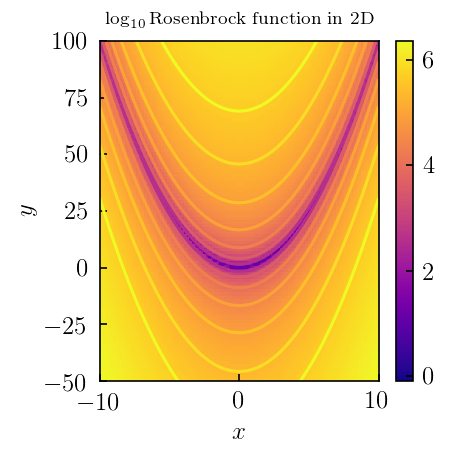

In [7]:
#xg, yg are 2D "grids" of x and y generated by meshgrid
# rg is 2D array with values of the Rosenbrock function for xg-yg grid

# contour levels; fairly arbitrary choice here, just to show the range of function values.
levs = np.log10(rg.min()+0.1*np.arange(1,10)**7)

plot_color_map(xg, yg, np.log10(rg), xlim=[xmin,xmax], ylim=[ymin,ymax], 
                   xlabel = r'$x$', ylabel = '$y$', cmap='plasma', colorbar=True, 
                   plot_title=r'$\rm \log_{10} Rosenbrock\ function\ in\ 2D$', contours=True, contcmap='plasma', levels = levs, 
                   figsize=3.0)


Derivatives of the Rosenbrock function in 2D with respect to $x$ and $y$ are relatively straightforward:

$$\frac{\partial r}{\partial x} = -400(y-x^2) - 2(1-x);\ \ \ \ \ \ \frac{\partial r}{\partial y}=200(y-x^2).$$

Derivatives in more dimensions have, of course, more terms, but overall have similar structure with respect to $x_i$ and $x_{i+1}$. These are implemented for an arbitrary number of dimensions in the routine below.

In [8]:
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200.*(xm-xm_m1**2) - 400.*(xm_p1 - xm**2)*xm - 2.*(1-xm)
    der[0] = -400.*x[0]*(x[1]-x[0]**2) - 2.*(1-x[0])
    der[-1] = 200.*(x[-1]-x[-2]**2)
    return der


We can use the knowledge of analytic derivative expression to employ methods that rely on gradient of the functions, such as Conjugate Gradient method and BFGS. 

In [9]:
from scipy.optimize import minimize

x0 = [-10, 10]

res = minimize(rosenbrock, x0, method='CG', jac=rosen_der,
               options={ 'disp': True})

print("minimum at :",res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 32
         Function evaluations: 78
         Gradient evaluations: 78
minimum at : [1. 1.]


In [10]:
from timeit import default_timer

In [11]:
# try in 5D
x0 = [-10, 10, -5, 10, 5]

tstart = default_timer()
res = minimize(rosenbrock, x0, method='CG', jac=rosen_der, options={ 'disp': True})

print("completed in %.3g sec"%(default_timer() - tstart))
print("minimum at:", res.x)

Optimization terminated successfully.
         Current function value: 3.930839
         Iterations: 120
         Function evaluations: 221
         Gradient evaluations: 221
completed in 0.0122 sec
minimum at: [-0.96205103  0.9357394   0.88071361  0.77787768  0.60509367]


This does not look too good, although result depends on the starting point. For example, changing the first value in $\mathbf{x}_0$ from $-10$ to $10$ results in the correct minimum. 

The same applies to the BFGS algorithm used below. 

In [12]:
from scipy.optimize import minimize

x0 = [-10, 10, -5, 10, 5]

tstart = default_timer()
res = minimize(rosenbrock, x0, method='BFGS', jac=rosen_der,
               options={'gtol': 1e-10,  'disp': True})

print("completed in %.3g sec"%(default_timer() - tstart))
print("minimum at :",res.x)

         Current function value: 3.930839
         Iterations: 107
         Function evaluations: 124
         Gradient evaluations: 123
completed in 0.0119 sec
minimum at : [-0.96205102  0.9357394   0.8807136   0.77787768  0.60509368]


These issues in many dimensions is what motivates methods based on the knowledge or approximations of the Hessian matrix. 

In [13]:
def rosen_hess(x):
    """
    Hessian matrix of the multivariate Rosenbrock function
    """
    x = np.asarray(x)
    H = np.diag(-400.*x[:-1],1) - np.diag(400.*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200.*x[0]**2  -400.*x[1]+2
    diagonal[-1] = 200.
    diagonal[1:-1] = 202. + 1200.*x[1:-1]**2 - 400.*x[2:]
    H = H + np.diag(diagonal)
    return H

A quasi-Newton method Newton-Conjugate Gradient

In [14]:
tstart = default_timer()
res = minimize(rosenbrock, x0, method='Newton-CG',
               jac=rosen_der, hess=rosen_hess,
               options={'xtol': 1e-10, 'disp': True})

print("completed in %.3g sec"%(default_timer() - tstart))
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 67
         Function evaluations: 82
         Gradient evaluations: 148
         Hessian evaluations: 67
completed in 0.0139 sec
[1. 1. 1. 1. 1.]


A different implementation of Newton-CG method that allows definition of boundaries. 

In [15]:
tstart = default_timer()
res = minimize(rosenbrock, x0, method='trust-ncg',
               jac=rosen_der, hess=rosen_hess,
               options={'gtol': 1e-8, 'disp': True})

print("completed in %.3g sec"%(default_timer() - tstart))
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 69
         Function evaluations: 70
         Gradient evaluations: 60
         Hessian evaluations: 59
completed in 0.0148 sec
[1. 1. 1. 1. 1.]


In [16]:
tstart = default_timer()
res = minimize(rosenbrock, x0, method='trust-exact',
               jac=rosen_der, hess=rosen_hess,
               options={'gtol': 1e-10, 'disp': True})
print("completed in %.3g sec"%(default_timer() - tstart))
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 41
         Function evaluations: 42
         Gradient evaluations: 35
         Hessian evaluations: 42
completed in 0.0265 sec
[1. 1. 1. 1. 1.]


What about the cases when analytical expressions for derivative do not exist? 

### Numerical evaluation of derivatives

Taylor expansion of $f(x)$ arond $x_0$:
$$f(x) =f(x_0)+f^\prime(x_0)\,(x-x_0)+\frac{1}{2}f^{\prime\prime}(x_0)\,(x-x_0)^2 + \frac{1}{6}f^{(3)}(x_0)\,(x-x_0)^3+ \mathcal{O}[(x-x_0)^4].$$

The term $\mathcal{O}[(x-x_0)^4]$ is the standard shorthand for ``and terms of order 4 and higher''.

Let's use this expression to evaluate it at $x=x_0-h$ and $x=x_0+h$, where $h$ is some small value:

$$f(x-h) = f(x_0) - f^\prime(x_0)\,h+\frac{1}{2}f^{\prime\prime}(x_0)\,h^2 - \frac{1}{6}f^{(3)}(x_0)\,h^3+ \mathcal{O}(h^4).$$

$$f(x+h) = f(x_0) + f^\prime(x_0)\,h+\frac{1}{2}f^{\prime\prime}(x_0)\,h^2 + \frac{1}{6}f^{(3)}(x_0)\,h^3+ \mathcal{O}(h^4).$$

Thus, $$f(x+h)-f(x-h) = 2\,f^\prime(x_0)\,h+ \frac{1}{3}f^{(3)}(x_0)\,h^3 + \mathcal{O}(h^5),$$

which gives 

$$f^\prime(x_0)=\frac{f(x+h)-f(x-h)}{2h} - \frac{1}{6}f^{(3)}(x_0)\,h^2 + \mathcal{O}(h^4)$$

In [17]:
def der(func, x, h):
    return 0.5*(func(x+h) - func(x-h))/h

def der1(func, x, h):
    return (4.*der(func, x, h/2)-der(func,x,h)) / 3.

def der2(func, x, h):
    return (16.*der1(func, x, h/2)-der1(func,x,h)) / 15.


In [18]:
nsteps = np.arange(25)
ders = np.zeros(np.shape(nsteps)[0])

hsteps = 1.0 / np.power(2., nsteps)
x0 = 1.0

for i, ns in enumerate(nsteps):
    ders[i] = der2(np.exp, x0, hsteps[i])
     
fexact = np.e
ferr = np.abs(1. - ders/fexact)

In [19]:
from codes.plot_utils import plot_line_points

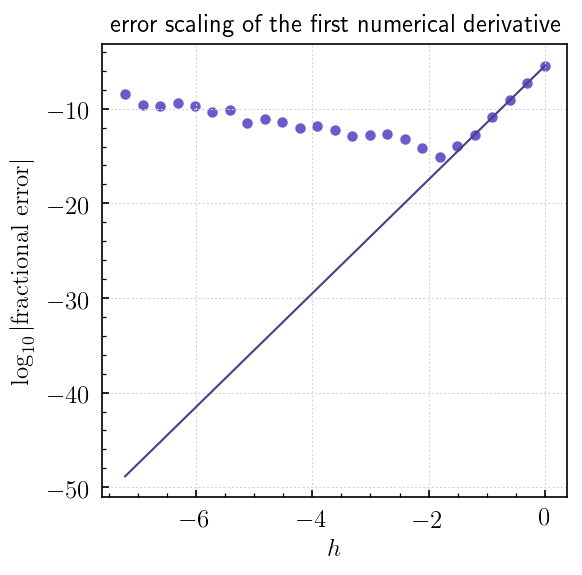

In [20]:
ferr_model = ferr[0] * (hsteps/hsteps[0])**6

plot_line_points(np.log10(hsteps), np.log10(ferr_model), 
                 xp=np.log10(hsteps), yp=np.log10(np.maximum(2.e-16,ferr)), points=True,
                 xlabel=r'$h$', ylabel=r'$\log_{10}\vert\rm fractional\ error\vert$', 
                 plot_title='error scaling of the first numerical derivative',
                 legendloc='lower right', grid=True, figsize=4)

I will leave you derivation of this equation as an exercise, because it is completely similar to how we derive corresponding equation for the Romberg integration.

$$f^\prime(x) = \frac{4^m R_m(h/2) - R_m(h)}{4^m-1} + \mathcal{O}(h^{2(m+1)})$$

where

$$R_{m+1} = \frac{4^m R_m(h/2) - R_m(h)}{4^m-1}.$$

is an estimate of the derivative which has truncation error of order $\mathcal{O}(h^{2(m+1)})$. Computing derivative by increasing $m$ in this estimateor is called the ***Richardson approach to the limit.***

The general method of improving accuracy and order of the scheme by eliminating leading truncation error terms was proposed by English mathematician, physicist, meteorologist, psychologist and pacifist Lewis Fry Richardson in 1922, when he attempted pioneering computations of air flows using a system of differential equations for weather prediction. This general approach is known as *Richardson's extrapolation.*
<p>
<center>
<img width=300 src="img/Lewis_Fry_Richardson.png"></img>
Lewis Fry Richardson (1881-1953)
</center>

### Royal Albert Hall in London

which Richardson envisioned filled with people doing parallel computations.

<img width=600 src="https://d15v4l58k2n80w.cloudfront.net/file/1396975600/48487571697/width=1280/height=720/format=-1/fit=crop/crop=0x0+7951x4476/rev=4/t=436739/e=never/k=d6183c30/032.jpg"></img>

### This was actually realized, although never on such huge scale

<img width=600 src="http://ece.umich.edu/bicentennial/images/timeline/human-computers.jpg"></img>

Thus, derivatives of smooth functions can be estimated numerically quite accurately using such approach to compute gradients and Hessian matrix. However, this can be quite expensive, especially for the Hessian where second derivatives are needed. 

Plus, there are many functions that are encountered that are discontinuous and for which derivatives can be ill-behaved. Thus, many *derivative-free* methods have been developed. 

### Finding minimum/maximum of a function

Last week I reviewed several methods that rely on the 1st and 2nd derivatives of the function in its $D$ parameters (forming the gradient and Hessian matrix, respectively). 

We did tests of several methods using multi-D Rosenbrock function. 

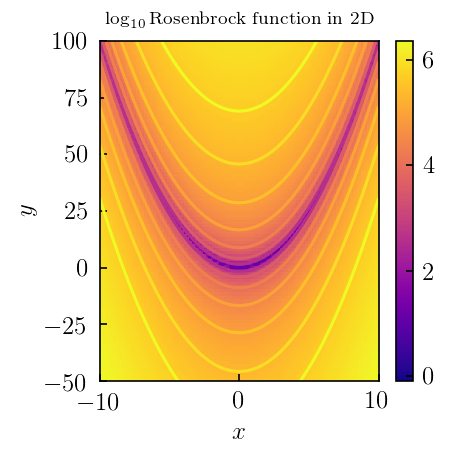

In [21]:
#xg, yg are 2D "grids" of x and y generated by meshgrid
# rg is 2D array with values of the Rosenbrock function for xg-yg grid

# contour levels; fairly arbitrary choice here, just to show the range of function values.
levs = np.log10(rg.min()+0.1*np.arange(1,10)**7)

plot_color_map(xg, yg, np.log10(rg), xlim=[xmin,xmax], ylim=[ymin,ymax], 
                   xlabel = r'$x$', ylabel = '$y$', cmap='plasma', colorbar=True, 
                   plot_title=r'$\rm \log_{10} Rosenbrock\ function\ in\ 2D$', contours=True, contcmap='plasma', levels = levs, 
                   figsize=3.0)


Derivatives of the Rosenbrock function in 2D with respect to $x$ and $y$ are relatively straightforward:

$$\frac{\partial r}{\partial x} = -400(y-x^2) - 2(1-x);\ \ \ \ \ \ \frac{\partial r}{\partial y}=200(y-x^2).$$

Derivatives in more dimensions have, of course, more terms, but overall have similar structure with respect to $x_i$ and $x_{i+1}$. These are implemented for an arbitrary number of dimensions in the routine below.

### Lessons learned

* Gradient methods work in some cases when function is smooth, but their results can depend on the starting position.


* Quasi-Newton methods that use Hessian matrix are much more reliable and have the same speed.


* Even when analytic expressions for derivatives are not available, for smooth functions accurate derivatives can be obtained using Richardson's method, which uses knowledge of the truncation error terms to construct higher order estimates of the derivative similarly to the Romberg integration. 

Dependence of the results on the initial position arises because initial position determines the path through along the "landscape" of the function that algorithm takes. Just like starting at different places in the mountains may make a hike to a particular destination more or less difficult. 

Hessian adds a significant information about the local curvature of the function, i.e. how fast gradient changes. This allows methods that use the Hessian matrix to getting off the cliff in the steep and rapidly changing parts of the function. 

but what if accurate derivatives are not available (for example, function is not smooth) or are too expensive to compute?

### Derivative-free methods

### A naive method: random walk

Follows a random walk of a *"walker*:

1. start at some initial point $\mathbf{x}=\mathbf{x}_0$. 

2. propose a step in a random direction $\mathbf{x}^\prime = \mathbf{x} + \Delta\mathbf{x}$

3. if $f(\mathbf{x}^\prime)< f(\mathbf{x})$, accept the step $\mathbf{x}=\mathbf{x}^\prime$, else go back to step 2.

Steps are terminated when some convergence is reached, for example no new step is accepted after some maximum number of proposed steps (it means that the walker is likely very close to the minimum). 


Components of the step vector $\Delta\mathbf{x}$ are usually chosen to follow Gaussian distribution, i.e. for a component $i$: 

$$p(\Delta x_i) = \frac{1}{\sqrt{2\pi}\,\sigma}\,\exp\left(-\frac{1}{2}\frac{\Delta x_i^2}{\sigma_i^2}\right) $$


The method requires choice of an optimal step sizes scale, $\sigma_i$. Performance and accuracy of the result will depend on this choice. However, this method is simple to implement, it does not require derivatives, and will do much better than the brute force search for a minimum. 

In [22]:
def minimize_by_random_walk(func, x0, stepsize, atol=1.e-6, verbose=True):
    assert(atol > 0.)
    nd = np.shape(x0)[0]
    xold = x0 + 100.*atol # just to get things started
    xnew = x0 # initial position
    step = stepsize # initial step size
    while np.abs(xnew - xold).max() > atol:
        xold = xnew
        fold = func(xold)
        xtry = xold + np.random.normal(scale=step, size=nd) # generate a random Gaussian-distributed step
        while func(xtry) >= fold:
            xtry = xold + np.random.normal(scale=step, size=nd)
        xnew = xtry
        if verbose:
            print(xnew, np.abs(xnew - xold))

    return xnew

In [32]:
x0 = np.array([0.5, 0.5])
#x0 = np.array([-10, 10, -5, 10, 5])

tstart = default_timer()
res = minimize_by_random_walk(rosenbrock, x0, .025, atol=5.e-4, verbose=False)

print("completed in %.3g sec"%(default_timer() - tstart))
print(res)

completed in 7.62 sec
[1.0000232  1.00005669]


In [33]:
# if you want to get info on the np.random.normal execute this cell
?np.random.normal

The method works robustly, even for the "difficult" starting position, and it would be very simple to introduce boundary control in this algorithm by simply discarding any trial steps outside specified boundary. 

However, as this test illustrates the algorithm can be very slow, especially if high accuracy is required.

###  Derivative-free methods: Nelder-Mead (aka simplex) method

The algorithm begins by forming an inital $(D + 1)$-dimensional polyhedron, or *simplex*,
of $D + 1$ points, $\mathbf{x}_i$, $i = 0, 1,\ldots, D$, that are randomly distributed throughout
the problem space domain. Indices of the points are sorted in ascending order of $f(\mathbf{x})$ so that $f(\mathbf{x}_0)$ is smallest and
$f(\mathbf{x}_D)$ is largest. It then proceeds as follows: 

1. To obtain a new trial point, $\mathbf{x}_r$, the worst point, $\mathbf{x}_D$, is reflected through the opposite face of the polyhedron using a scaling factor, $s_1$:

$$\mathbf{x}_r=\mathbf{x}_D + s_1\,(\mathbf{x}_m - \mathbf{x}_D),$$

where $\mathbf{x}_m$ is mean (the centroid) of all $\mathbf{x}$, excluding $\mathbf{x}_D$:

$$\mathbf{x}_m = \frac{1}{D}\,\sum\limits_{i=0}^{D-1}\mathbf{x}_i.$$

For example, when $D = 2$, the simplex is a triangle.

2. If $f(\mathbf{x}_r)<f(\mathbf{x}_0)$, then take another step in the same direction with scaling factor of $s_2$:

$$\mathbf{x}_e=\mathbf{x}_r + s_2\,(\mathbf{x}_m - \mathbf{x}_D),$$

If $f(\mathbf{x}_e)<f(\mathbf{x}_0)$, then $\mathbf{x}_D=\mathbf{x}_e$ and we go to step 1 above, else
    $\mathbf{x}_D=\mathbf{x}_r$.
    
3. Else if $f(\mathbf{x}_r)>f(\mathbf{x}_0)$, compare $f(\mathbf{x}_r)$ to $f(\mathbf{x}_{D-1})$ and if $f(\mathbf{x}_r)$ is smaller $\mathbf{x}_{D-1}=\mathbf{x}_r$, if not than *shrink the entire simplex* by the scaling factor of $s_3$.

This description is not fully complete, as there are a number of checks and choices made in the last step. It is meant to give an idea of how the algorithm works. It'd be easier to examine the pseudo-code for the algorithm. 

<img width=500 src="img/simplex_pseudo_code.PNG"></img>

Using Nelder-Mead (simplex) minimization method that does not rely on function derivatives to find the minimum of the Rosenbrock function.  

In [37]:
x0 = [-10, 10]
x0 = [-10, 10, -5, 10, 5]

tstart = default_timer()
res = minimize(rosenbrock, x0, method='nelder-mead', tol=1.e-12)
print("completed in %.3g sec"%(default_timer() - tstart))

print("minimum at :",res.x)

completed in 0.0289 sec
minimum at : [0.99513568 0.98998451 0.98069012 0.96593587 0.93354015]


In [109]:
tstart = default_timer()
res = minimize(rosenbrock, x0, method='Nelder-Mead', options={'xtol': 1e-10, 'disp': True})

print("completed in %.3g sec"%(default_timer() - tstart))
print("minimum at :",res.x)

completed in 0.0659 sec
minimum at : [0.99513568 0.98998451 0.98069012 0.96593587 0.93354015]


###  Derivative-free methods: differential evolution

Developed by R. Storn and K. Price in 1997 (<a href="https://link.springer.com/article/10.1023%2FA%3A1008202821328">Storn & Price 1997</a>), the <a href="https://en.wikipedia.org/wiki/Differential_evolution">differential evolution algorithm</a> is remarkably simple to implement, works in arbitrary number of dimensions, does not require function derivatives, allows imposing bounds on the domain, and is quite efficient. 

The reason the method is called "differential evolution" is because the initial population of points in $D$ dimensions can be thought of as evolving towards a minimum during algorithm iterations. The evolution is differential because it is driven by scaled differences between point locations. 

Interestingly, one of the initial drivers for development of this algorithm was a problem of solving the least squares mimimization problem to find coefficients of the 5D polynomial approximation using Chebyshev polynomial expansion, which was intractable with other methods. Since then, DE algorithm was successfully applied for this problem for up to 33-dimensional polynomials. 

In depth description of the differential algorithm, its variations, tests, and applications can be found in a book by R. Storn, K. Price and J. Lampinen "*Differential evolution : a practical approach to global optimization*" <a href="https://catalog.lib.uchicago.edu/vufind/Record/8875926">available online</a> through U.Chicago library. 

Start with $N_p$ members of the population randomly distributed in the problem domain. Vector of coordinates for each member is indexed from $0$ to $N_p-1$ and collection of all vectors $\mathbf{X}_{\rm now}=(\mathbf{x}_{\rm now,0},\mathbf{x}_{\rm now,1},\ldots,\mathbf{x}_{{\rm now},N_p-1})$ forms the current population, where each $\mathbf{x}_{\rm now,i}$ is a $D$-dimensional vector, where $D$ is the number of parameters of the minimized function.   

The algorithm then proceeds through iterations (called evolutionary or generational cycles) that lead to evolution of the population towards function minimum. Each cycle consists of the *"mutation"* and *"selection* stages for each point vector $\mathbf{x}_i$ in $\mathbf{X}_{\rm now}$ (each member of the population) that leads to formation of the new population $\mathbf{X}_{\rm next}$:

* *Mutation stage:*  select three random indices from $0$ to $N_p-1$, $r_1$, $r_2$, $r_3$. 
Perturb vector with index $r_3$ by the scaled difference of vectors with indices $r_2$ and $r_3$: 
$\mathbf{x}^\prime_i=\mathbf{x}_{{\rm now}, r_3} + s\,(\mathbf{x}_{{\rm now}, r_2}-\mathbf{x}_{{\rm now}, r_1})$, where $s$ is a parameter. 


* *Selection stage:* if $f(\mathbf{x}^\prime_i)\leq f(\mathbf{x}_{{\rm now},i})$, then $\mathbf{x}_{{\rm next},i}=\mathbf{x}^\prime_i$, else $\mathbf{x}_{{\rm next},i}=\mathbf{x}_{{\rm now},i}$ (no mutation). 

Once all members of the population went through mutation and selection stages go back to the next iteration and $\mathbf{X}_{\rm next}$ becomes $\mathbf{X}_{\rm now}$ and the cycle repeats. 

Evolutionary cycles continue until some convergence criterion is met. For example, maximum difference between vectors in $\mathbf{X}_{\rm next}$ and $X_{\rm now}$ is smaller than the specified threshold. 

Differential evolution method is implemented in <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution"><tt>scipy.optimize.differential_evolution</tt></a> routine. 

Here is pseudo-code for the simplest version of the differential evolution algorithm, which already should work quite well, but can be further improved by various modifications. 

    npop = np.size(x0)[0] # the number of population members
    fnow = func(xnow)
    xnow = np.copy(x0)
    xnext = np.zeros_like(xnow)
    ....
    while some convergence criterion is not met: 
        # xnow is a vector of coordinate vectors of the current population
        # xnext is a vector of coordinate vector of the next gen population
        for i in range(npop):
            # generate random indices  ir1, ir2, ir3 
            # where all indices are not equal to each other and not equal to i
            # s can be a constant for large npop, but it's more safe to make it a Gaussian random number
            xtry = xnow[ir3] + s * (xnow[ir1] - xnor[ir2])
            if func(xtry) <= fnow[i]:
                xnext[i] = xtry
            else:
                xnext[i] = xnow[i]

### Initialization of the population for the DE algorithm 

Mutation stage of the algorithm requires that population members are in different locations, otherwise the difference $\mathbf{x}_{{\rm now}, r_2}-\mathbf{x}_{{\rm now}, r_1}$ will be zero and location of $\mathbf{x}_{{\rm now}, r_3}$ will simply be duplicated to location of $\mathbf{x}^\prime_i$ in the mutation stage.

Thus, initial population members positions must be different. There are different ways to place population members. Assuming that we are searching for a minimum within some rectangular domain defined by the minimum and maximum values along each coordinate axis: $\mathbf{x}_{\rm min}$ and $\mathbf{x}_{\rm max}$, we can initialize the members as 

$$\mathbf{x}_0 = \mathbf{x}_{\rm min} + (\mathbf{x}_{\rm max}-\mathbf{x}_{\rm min}) \times \mathrm{rand}(0,1),$$

where $\mathrm{rand}(0,1)$ is a random number uniformly distributed from 0 to 1. This choice makes sense if we do not know location of the minimum and we are spreading the population members as widely as possible. To make the distribution of members more uniform, certain placement strategies can be used instead of random distribution above, such as <a href="https://www.johndcook.com/blog/2009/03/16/quasi-random-sequences-in-art-and-integration/">quasi-random sequences</a>.

Another possibility is to initialize locations of population members around a given point $\mathbf{x}_{0c}$ by using random numbers drawn from a Gaussian distribution centered at $\mathbf{x}_{0c}$:

$$\mathbf{x}_0 = \mathrm{gaussian}(\mathbf{x}_{0c}, \Sigma),$$

where $\Sigma$ is a vector of the rms dispersions along each of the coordinates (can be the same for all coordinates) or a <a href="https://datascienceplus.com/understanding-the-covariance-matrix/">covariance matrix</a>. This choice makes sense if we have a good idea where the minimum is roughly, so that we can choose $\mathbf{x}_{0c}$ to be near the suspected location. 


### Modification of the DE algorithm using randomized $s$ scaling factor

Although this is unlikely when the size of the evolved population is large (say $>10-20D$), for small population sizes it is possible that the same combinations of <tt>ir1, ir2, ir3</tt> will be drawn for multiple members. If the trial step is successful, this will result in multiple members having the same location. Several of such events can lead to all population members having the same location. Given that the algorithm relies on existence of multiple population members at different locations (population diversity), if population degenerates to a single point, the DE algorithm can longer work. 

To avoid this, one can replace constant scaling factor $s$ for each population member with a number randomly drawn from, say, Gaussian distribution centered at $s$ and with the rms dispersion of say $0.1s>0$ (this can be a parameter). In this case, the mutation stage will result in different locations, even if the <tt>ir1, ir2, ir3</tt> are the same for different population members. 

### Modification of the DE algorithm with the crossover stage

One of the modifications to this basic algorithm is introduction of the ***crossover stage*** so that the mutation and crossover stages together are as follows: 

* compute mutation vector $\mathbf{x}^\prime_i=\mathbf{x}_{{\rm now}, r_3} + s\,(\mathbf{x}_{{\rm now}, r_2}-\mathbf{x}_{{\rm now}, r_1})$, as before, where vector $\mathbf{x}^\prime_i$ has components $\mathbf{x}^\prime_i=[x^{\prime}_{0i}, x^{\prime}_{1i}, \ldots, x^{\prime}_{(D-1)i}]$, and $D$ is the number of parameters of the minimized function (i.e., dimensionality of the problem). 

* "***crossover stage***": form the trial vector $\mathbf{x}^{\prime\prime}_i=[x^{\prime\prime}_{0i}, x^{\prime\prime}_{1i}, \ldots, x^{\prime\prime}_{(D-1)i}]$, where 

\begin{equation}
x^{\prime\prime}_{ji} = 
\begin{cases}
x^{\prime}_{ji}, \ {\rm if\ }r_j\leq \mathrm{cr\ or\ } j= \mathrm{ir}_i,\\
x_{{\rm now},ji}, \ {\rm if\ }r_j> \mathrm{cr\ or\ } j\ne \mathrm{ir}_i,
\end{cases}
\end{equation}

and $r_j$ is the random floating point number uniformly distributed in the interval $[0,1]$ that is generated for the index $j$, and $\mathrm{ir}_i$ is the random integer uniformly distributed in the range $[0, D-1]$ generated for index $i$, which ensures that $\mathbf{x}^{\prime\prime}_i$ gets at least one element from $\mathbf{x}^\prime_i$. The crossover parameter $\mathrm{cr}\in [0,1]$ is a constant set by user. 

* *Selection stage:* if $f(\mathbf{x}^{\prime\prime}_i)\leq f(\mathbf{x}_{{\rm now},i})$, then $\mathbf{x}_{{\rm next},i}=\mathbf{x}^{\prime\prime}_i$, else $\mathbf{x}_{{\rm next},i}=\mathbf{x}_{{\rm now},i}$ (no mutation). 


In [38]:
from scipy.optimize import differential_evolution

xmin, xmax, ymin, ymax = -10., 10., -10., 10.
x0 = [-10, 10]
#bounds = [(xmin, xmax), (ymin, ymax)]
x0 = [-10, 10, -5, 10, 5]
bounds = [(xmin, xmax), (ymin, ymax), (xmin, xmax), (ymin, ymax), (xmin, xmax)]

tstart = default_timer()
res = differential_evolution(rosenbrock, bounds)

print("completed in %.3g sec"%(default_timer() - tstart))
print("minimum at :",res.x)

completed in 1.66 sec
minimum at : [1. 1. 1. 1. 1.]


### DE algorithm: parallelization

Each iteration of the DE algorithm can be fairly easily parallelized because mutation and selection of each population member is independent. This allows using large population sizes and is particularly useful when function evaluation is expensive. 

### Optimization methods

We reviewed just a subset of the commonly used methods. A larger number of variants of these methods and other, more sophisticated methods exist. 

| method class   |    single-point                  |  multi-point  |
|----------------|----------------------------------|---------------|
| derivative-based | Steepest descent              | multi-start   |
|                |     Conjugate gradient          |               |
|                | Quasi-Newton methods (BFGS)       |               |
|                |                                |               |
| derivative-free |  Random walk                  | Simplex (aka Nelder-Mead method) |
|                |   Hooke and Jeeves             | Differential evolution |

SciPy's <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize"><tt>scipy.optimize.minimize</tt></a> routine finds minima of functions and has options to use different methods. 

For example, 

| <tt>minimize method</tt> option   |    method name                  |  method class  |
|----------------|----------------------------------|---------------|
| <tt>Nelder-Mead</tt> | Nelder-Mead  (aka simplex) | derivative-free |
|     <tt>Powell</tt>  |     <a href="https://en.wikipedia.org/wiki/Powell%27s_method">Powell's conjugate gradient</a>    |    derivative-based           |
|     <tt>CG</tt>      |     Conjugate gradient          |    derivative-based           |
 | <tt>BFGS</tt>   |    <a href="https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm">Broyden–Fletcher–Goldfarb–Shanno</a>          | derivative-based, Quasi-Newton   |
 | <tt>L-BFGS-M</tt>   |  <a href="https://en.wikipedia.org/wiki/Limited-memory_BFGS"> limited-memory Broyden–Fletcher–Goldfarb–Shanno</a>          | derivative-based, Quasi-Newton   |
|     <tt>Newton-CG</tt>       |   Newton conjugate gradient            | derivative based            |
|     <tt>TNC</tt>       |   Truncated Newton            | derivative based            |
|          <tt>COBYLA</tt>      | <a href="https://en.wikipedia.org/wiki/COBYLA">Constrained Optimization BY Linear Approximation</a>     |  derivative-free             |

plus several more. Only some of these methods (e.g., L-BFGS-B, TNC, SLSQP and
        trust-constr and COBYLA methods) allow any constraint on the boundaries of parameter space that the algorithm will explore. This is critical if we use approximation for the function that was constructed on a limited sub-space, like we did for $d_L$ approximating it for $\Omega_{\rm m0}\in[0,1]$ and $\Omega_\Lambda\in [0,1]$. 

Description of these different methods and examples of their use with the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize"><tt>scipy.optimize.minimize</tt></a> routine is described <a href="https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html">here</a> and <a href="https://scipy-lectures.org/advanced/mathematical_optimization/index.html">here</a>. 

### Conclusions

* Correct results are not always guaranteed. Results need to be checked by re-running from different starting points and using different methods. 


* Methods differ significantly in the number of function evaluations they need to determine the minimum to the required accuracy. 


* Availability of the analytic expressions for the gradient and Hessian can help greatly, but these are not always available. 


* The number of methods that allow bounds or other type of constraints on $\mathbf{x}$ is limited. 